Chiesa Codex Ashburnham
=========
Disclaimer:
------------
Alcuni screenshot sono presi in un momento intermedio dello sviluppo del codice. Per generare una chiesa cava all'interno ho dovuto fare diversi JOIN e DIFFERENCE che hanno appesantito molto l'esecuzione del codice.  
L'ultimissima versione del codice approssima i solidi a cupole in maniera molto più grezza (8 punti invece di 42). L'effetto estetico è peggiore ma il tempo di calcolo scende considerevolmente (bisogna aspettare comunque un minuto). La maggior parte degli screen è stata fatta con cupole "a 42 punti".  
  
  
Link: https://it.wikipedia.org/wiki/Codice_Ashburnham#/media/File:Codex_ashburnham.jpg

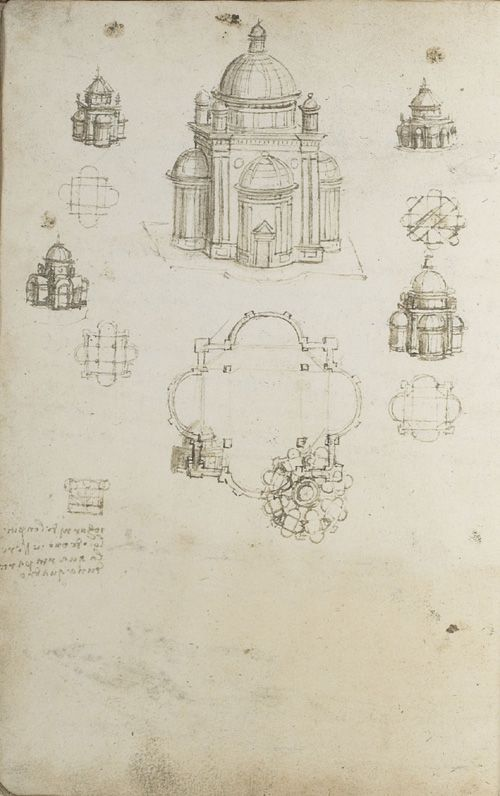

In [2]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.012455 seconds


In [13]:
def HALFSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI*2)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    return ret
  return SPHERE0

def QUARTERSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    return ret
  return SPHERE0

def EIGHTSPHERE(radius):
  """
  >>> (SPHERE(1)([8,8])).box()
  Box([-1.0, -1.0, -1.0], [1.0, 1.0, 1.0])
  >>> VIEW(SPHERE(1)([16,16]))
  """
  def SPHERE0(subds):
    N , M = subds
    domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI/2)(M)])
    fx  = lambda p: radius * math.cos(p[0]) * math.sin(p[1])
    fy  = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
    fz  = lambda p: radius * math.sin(p[0]) 
    ret = JOIN(MAP([fx, fy, fz])(domain))
    verts=[[0,0,0]]
    cells=[[1]]
    pols=[]
    center=MKPOL([verts,cells,pols])
    return JOIN([ret, center])
  return SPHERE0

def HALFCIRCUMFERENCE(R):
    return lambda N: MAP(lambda p: [R*math.cos(p[0]),R*math.sin(p[0]) ])(INTERVALS(PI)(N))

def NTHCIRCLE(R,n):
    """
    Ritorna 1/n di un cerchio
    """
    def CIRCLE0(subs):
        N , M = subs
        domain= POWER([INTERVALS(2*PI/n)(N), INTERVALS(R)(M)])
        fun=lambda p: [p[1]*math.cos(p[0]),p[1]*math.sin(p[0])]
        return MAP(fun)(domain)
    return CIRCLE0

def NTHRING(args):
    """
    Ritorna 1/n di un anello
    """
    R1, R2, n = args
    return DIFFERENCE([NTHCIRCLE(R1,n)([8,8]), NTHCIRCLE(R2,n)([8,8])])

#########################################################################################

def edges(h,l,o):
    """
    Restituisce un parallelepipedo di base triangolare.
    h: altezza. Se 0 la figura collassa su un triangolo
    o: orientamento del triangolo. Positivo in un verso negativo nell'altro
    """
    verts=[[0,0],[l,0],[0,l]]
    cells=[[1,2,3]]
    pols=[]
    temp=MKPOL([verts,cells,pols])
    if o<0:
        temp=R([1,2])(0.75*PI)(T(2)(-l)(temp))
    else:
        temp=R([1,2])(-0.75*PI)(T(1)(-l)(temp))
    return PROD([temp,QUOTE([h])])

def base(h):
    verts=[[0,0],[10,0],[0,10]]
    cells=[[1,2,3]]
    pols=[]
    return PROD([MKPOL([verts,cells,pols]),QUOTE([h])])

def punta(h):
    verts=[[0,0,0],[0.1*h,0,0],[0,0.1*h,0],[0,0,h]]
    cells=[[1,2,3,4]]
    pols=[]
    return MKPOL([verts,cells,pols])

def wall(h,k):
    """
    Ritorna un muro con un'apertura per una cupola.
    h: altezza del muro
    k: altezza dell'apertura fino al centro della circonferenza
    """
    verts=[[10,0],[9.5,0],[0,10],[0,9.5]]
    cells=[[1,2,3,4]]
    pols=[]
    full=PROD([MKPOL([verts,cells,pols]),QUOTE([h])])
    actual=DIFFERENCE([full,hole(k)])
    return actual

def baseWithHole(h):
    verts=[[0,0],[10,0],[0,10]]
    cells=[[1,2,3]]
    pols=[]
    tmp=MKPOL([verts,cells,pols])
    base=DIFFERENCE([tmp,CIRCLE(6)([8,8])])
    return PROD([base,QUOTE([h])])

def hole(h):
    tmp=CIRCLE(4)([8,8])
    tmp=T(3)(h+4)(R([1,3])(-PI/2)(PROD([tmp,QUOTE([20])])))
    verts=[[0,-4],[0,4],[20,-4],[20,4]]
    cells=[[1,2,3,4]]
    pols=[]
    tmp2=MKPOL([verts,cells,pols])
    return R([1,2])(0.25*PI)(JOIN([tmp,tmp2]))

def hole2():
    tmp=CIRCLE(1)([8,8])
    tmp=T(3)(2.5)(R([1,3])(-PI/2)(PROD([tmp,QUOTE([20])])))
    verts=[[0,-1],[0,1],[20,-1],[20,1]]
    cells=[[1,2,3,4]]
    pols=[]
    tmp2=MKPOL([verts,cells,pols])
    return R([1,2])(0.25*PI)(JOIN([tmp,tmp2]))

#########################################################################################

def quarterCupola(R,h,b):
    """
    Metodo per creare quarti di cupola.
    R: raggio
    h: altezza della struttura sottostante
    b: se = 0 non è disegnata una base. Altrimenti c'è una base di altezza b
    """
    upperCupola=DIFFERENCE([EIGHTSPHERE(1.08*R)([8,8]), EIGHTSPHERE(R)([8,8])])
    decor=PROD([NTHRING([1.13*R,R,4]),QUOTE([0.05*R])])
    totCupola=T(3)(h)(STRUCT([upperCupola, decor]))
    pannelloCupola=PROD([NTHRING([1.08*R,R,4]),QUOTE([h])])
    if b == 0:
        return STRUCT([totCupola, pannelloCupola])
    else:
        baseCupola=PROD([NTHCIRCLE(R,4)([8,8]), QUOTE([b])])
        return STRUCT([totCupola, pannelloCupola, baseCupola])

def quarterBase():
    myv=STRUCT([base(0.5), wall(16,5),
            T(2)(9.5)(edges(16,1,-1)), T(2)(6)(edges(16,0.5,-1)),
            T(1)(9.5)(edges(16,1,1)), T(1)(6)(edges(16,0.5,1))])
    return myv

def quarterCeiling(h):
    tmpCupola = STRUCT([T(3)(2.6)(punta(1)), quarterCupola(0.6,2,0)])
    mezzaCupola = STRUCT([tmpCupola, R([1,2])(-PI/2)(tmpCupola)])
    base=STRUCT([T(3)(h),baseWithHole(0.5),
                T(2)(9.25)(edges(0.7,1.5,-1)),
                T(1)(9.25)(edges(0.7,1.5,1)),
                T(2)(10.3)(mezzaCupola),
                T(1)(10.3)(R([1,2])(PI/2)(mezzaCupola))])
    return base

def quarterFacade():
    mezzaCupola = STRUCT([quarterCupola(4,9,0.5), R([1,2])(PI/2)(quarterCupola(4,9,0.5))])
    mezzaCupola = R([1,2])(-0.25*PI)(T(2)(7.07)(mezzaCupola))
    cupolaCentrale = STRUCT([quarterCupola(6,4,0), T(3)(10)(punta(5))])
    return STRUCT([quarterCeiling(16),quarterBase(),T(3)(16)(cupolaCentrale),mezzaCupola])

In [61]:
# Questo è il "piano terra" dell'immagine sotto
myv=STRUCT([base(0.5), wall(16,5),
            T(2)(9.5)(edges(16,1,-1)), T(2)(6)(edges(16,0.5,-1)),
            T(1)(9.5)(edges(16,1,1)), T(1)(6)(edges(16,0.5,1))])
final=STRUCT([myv, R([1,2])(0.5*PI), myv, R([1,2])(0.5*PI), myv, R([1,2])(0.5*PI), myv])
VIEW(final)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f56c4e3f8a0> >

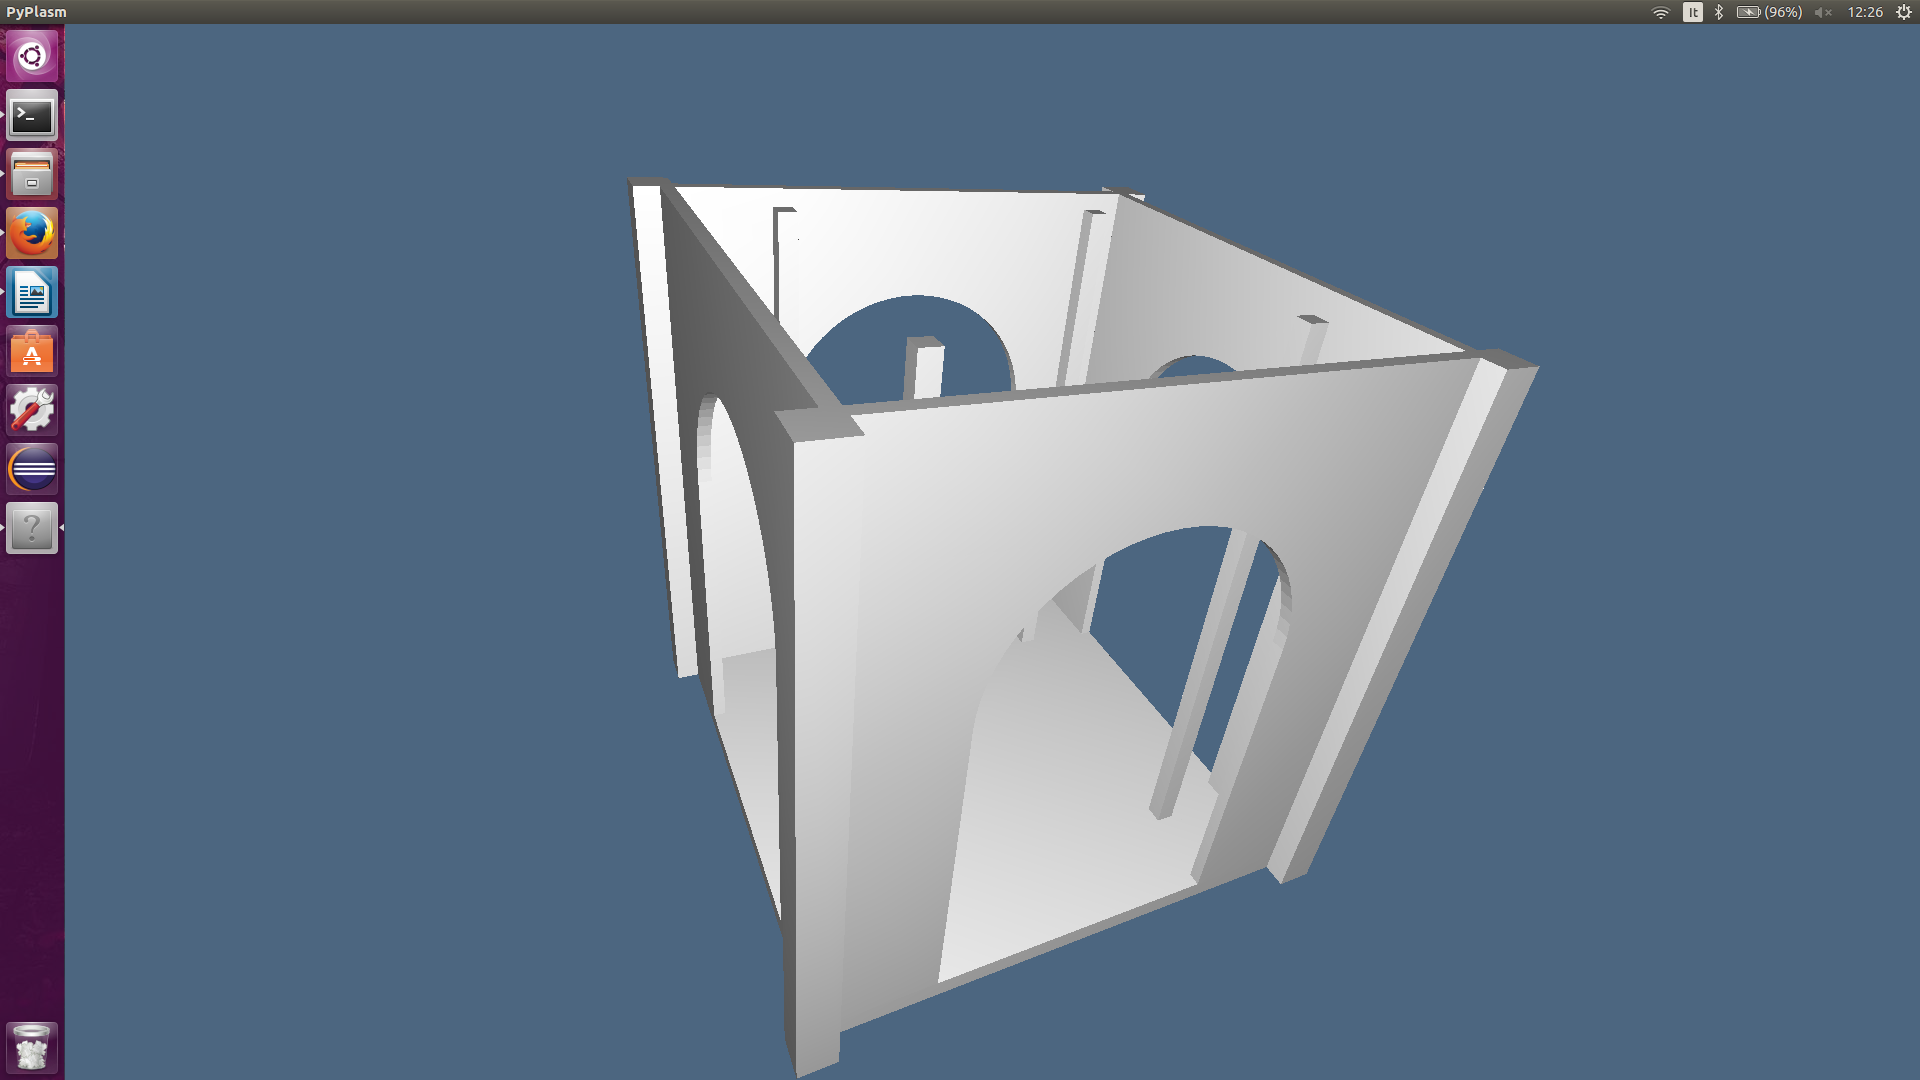

In [28]:
VIEW(quarterCupola(6,10,0.3))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f25272e6e10> >

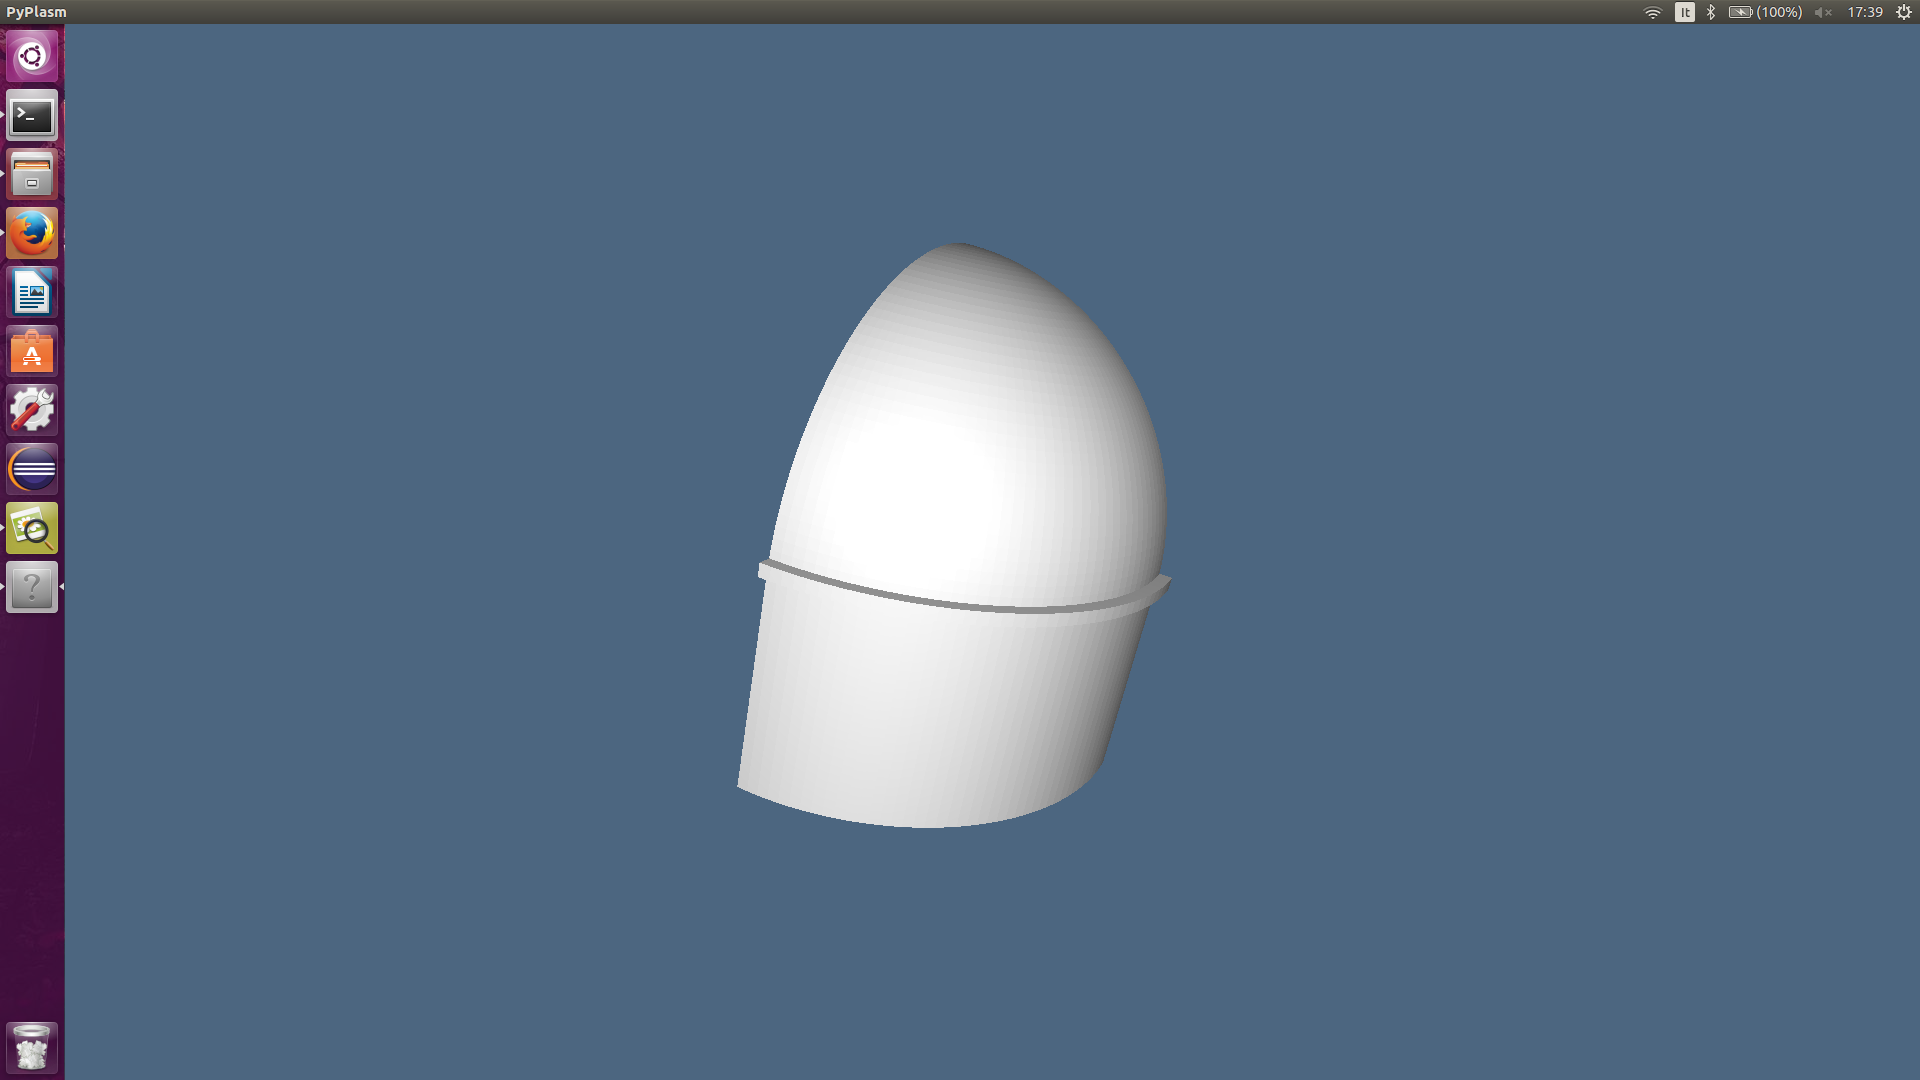

In [66]:
# Questo è il codice delle immagini di sotto. Rappresenta una sola facciata della chiesa.
# Una volta assicurato il suo funzionamento ho inserito tutto nel metodo quarterFacade
mezzaCupola = STRUCT([quarterCupola(4,9,0.5), R([1,2])(PI/2)(quarterCupola(4,9,0.5))])
mezzaCupola = R([1,2])(-0.25*PI)(T(2)(7.07)(mezzaCupola))
cupolaCentrale = STRUCT([quarterCupola(6,4,0), T(3)(10)(punta(5))])
VIEW(STRUCT([quarterCeiling(16),quarterBase(),T(3)(16)(cupolaCentrale),mezzaCupola]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f252728cf30> >

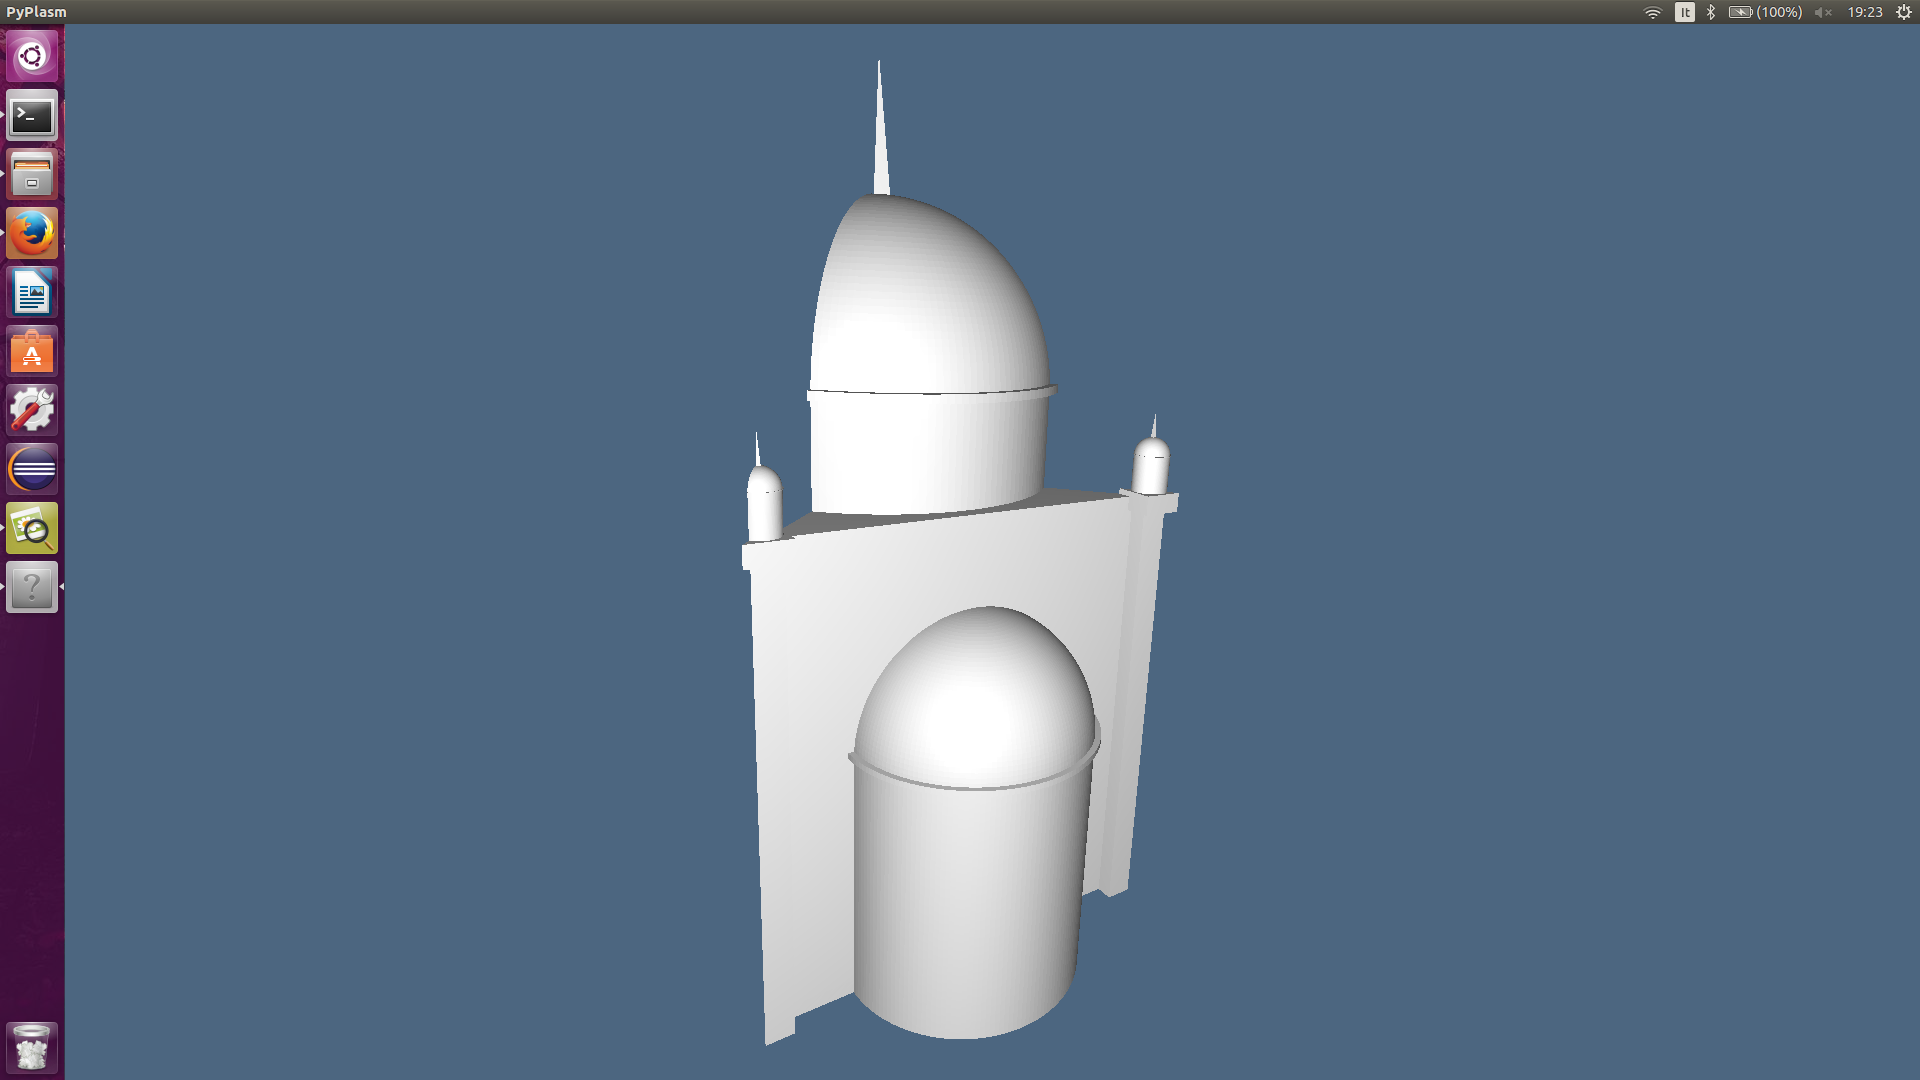
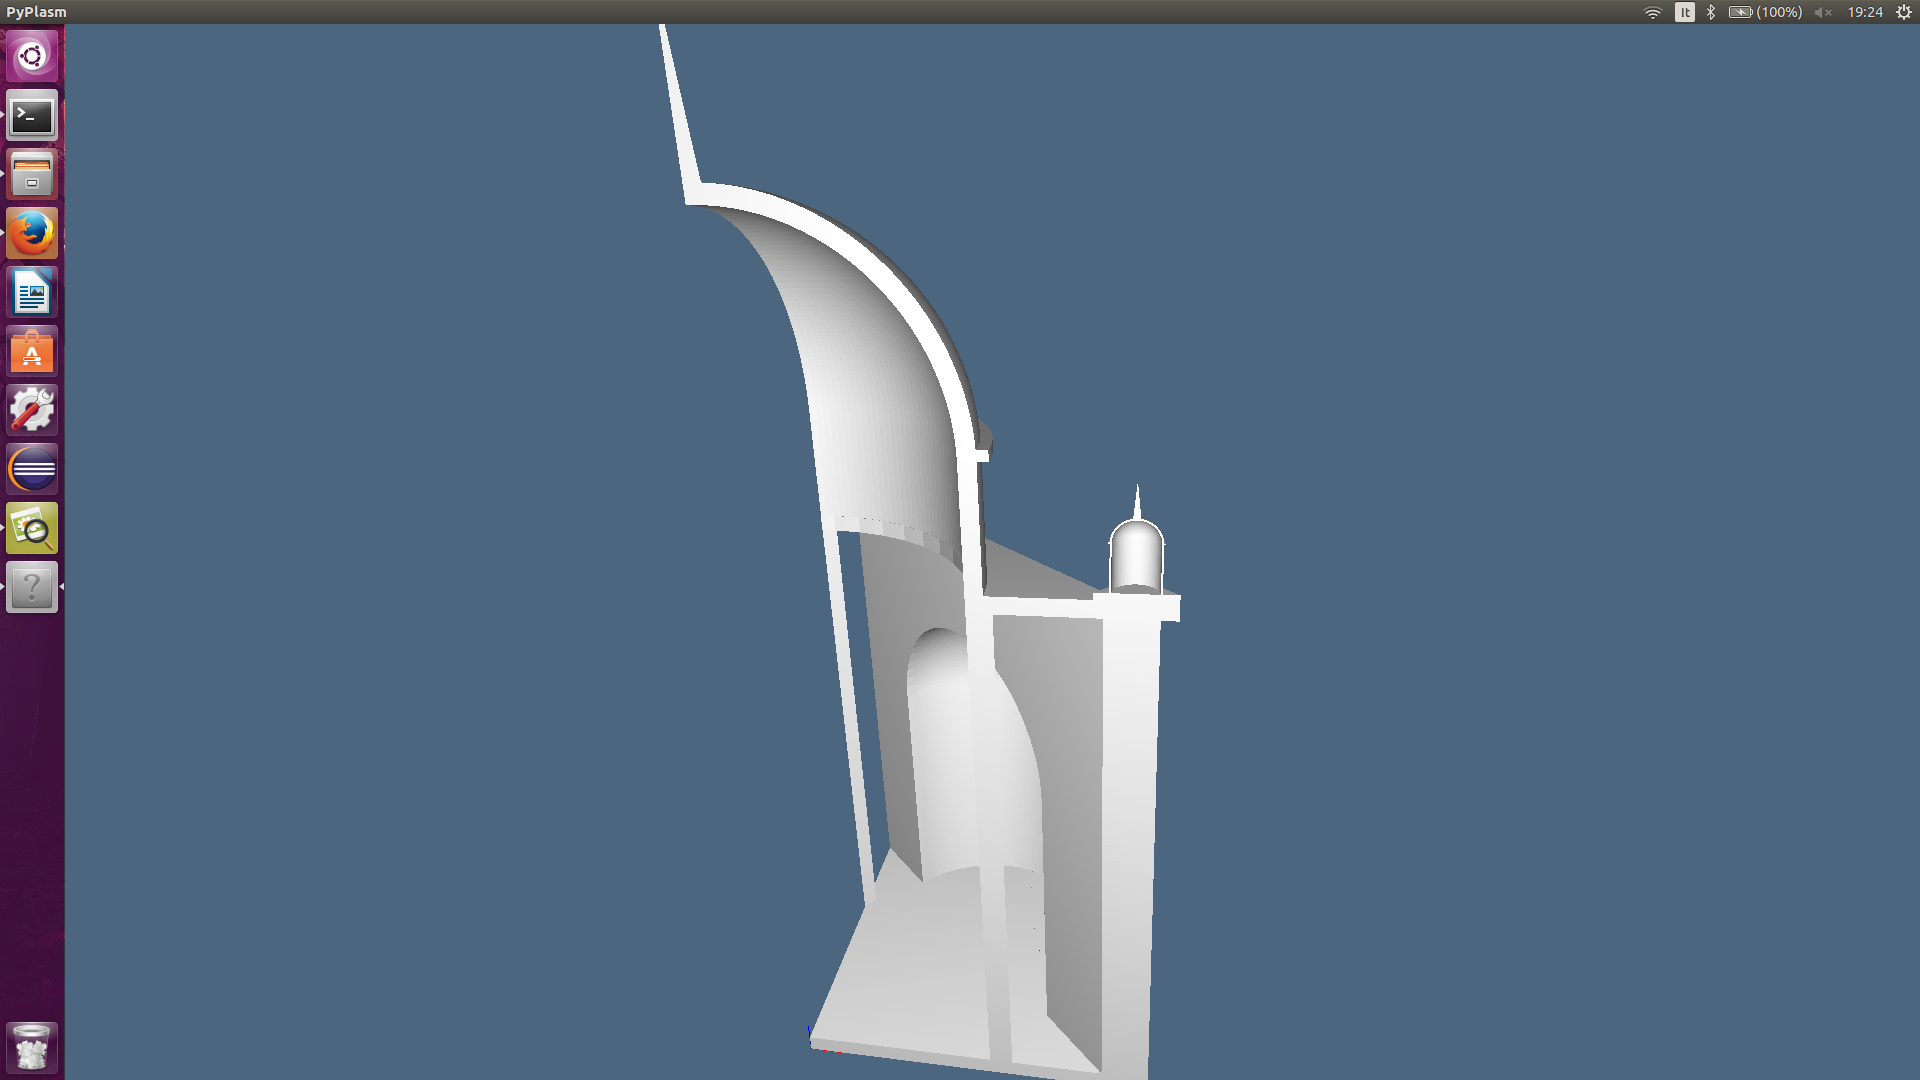

In [3]:
final = STRUCT([quarterFacade(), R([1,2])(PI/2), quarterFacade(), R([1,2])(PI/2),
                quarterFacade(), R([1,2])(PI/2), quarterFacade()])
VIEW(final)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f79d1ec6f90> >

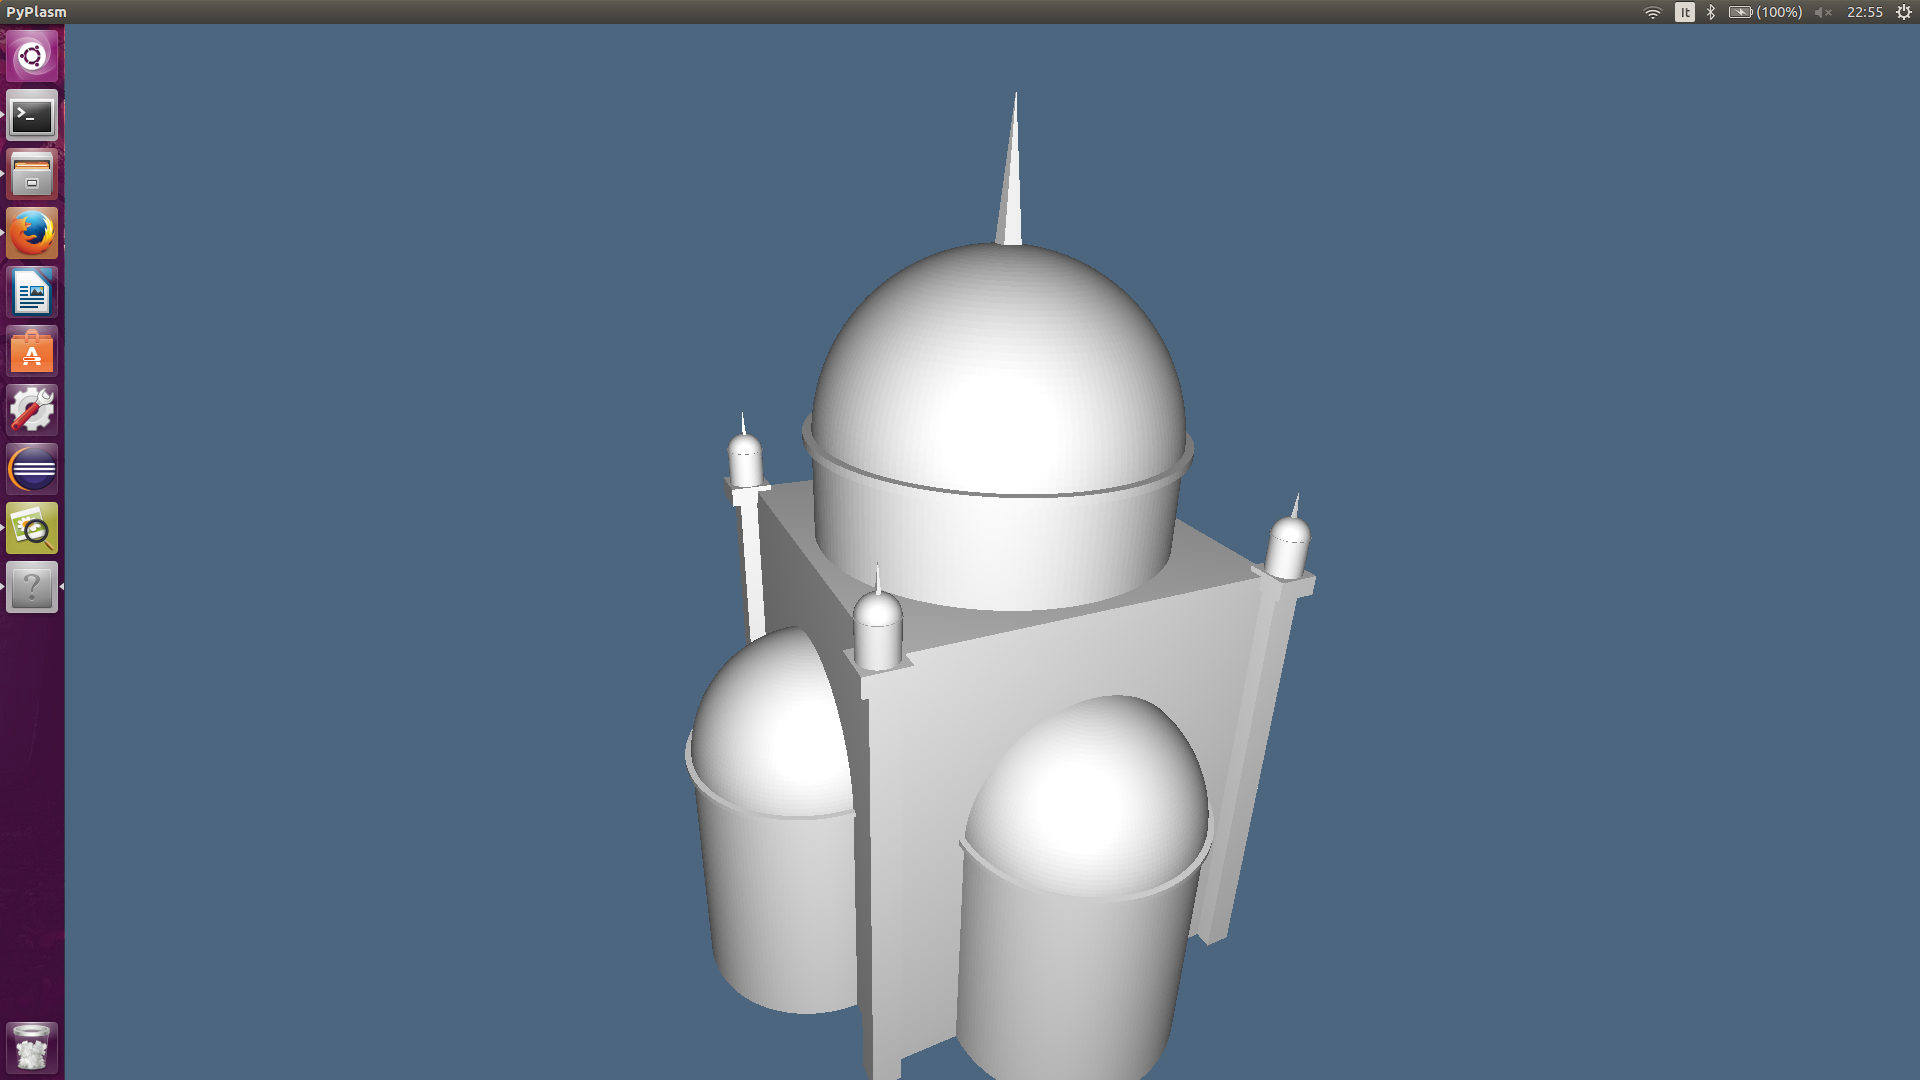
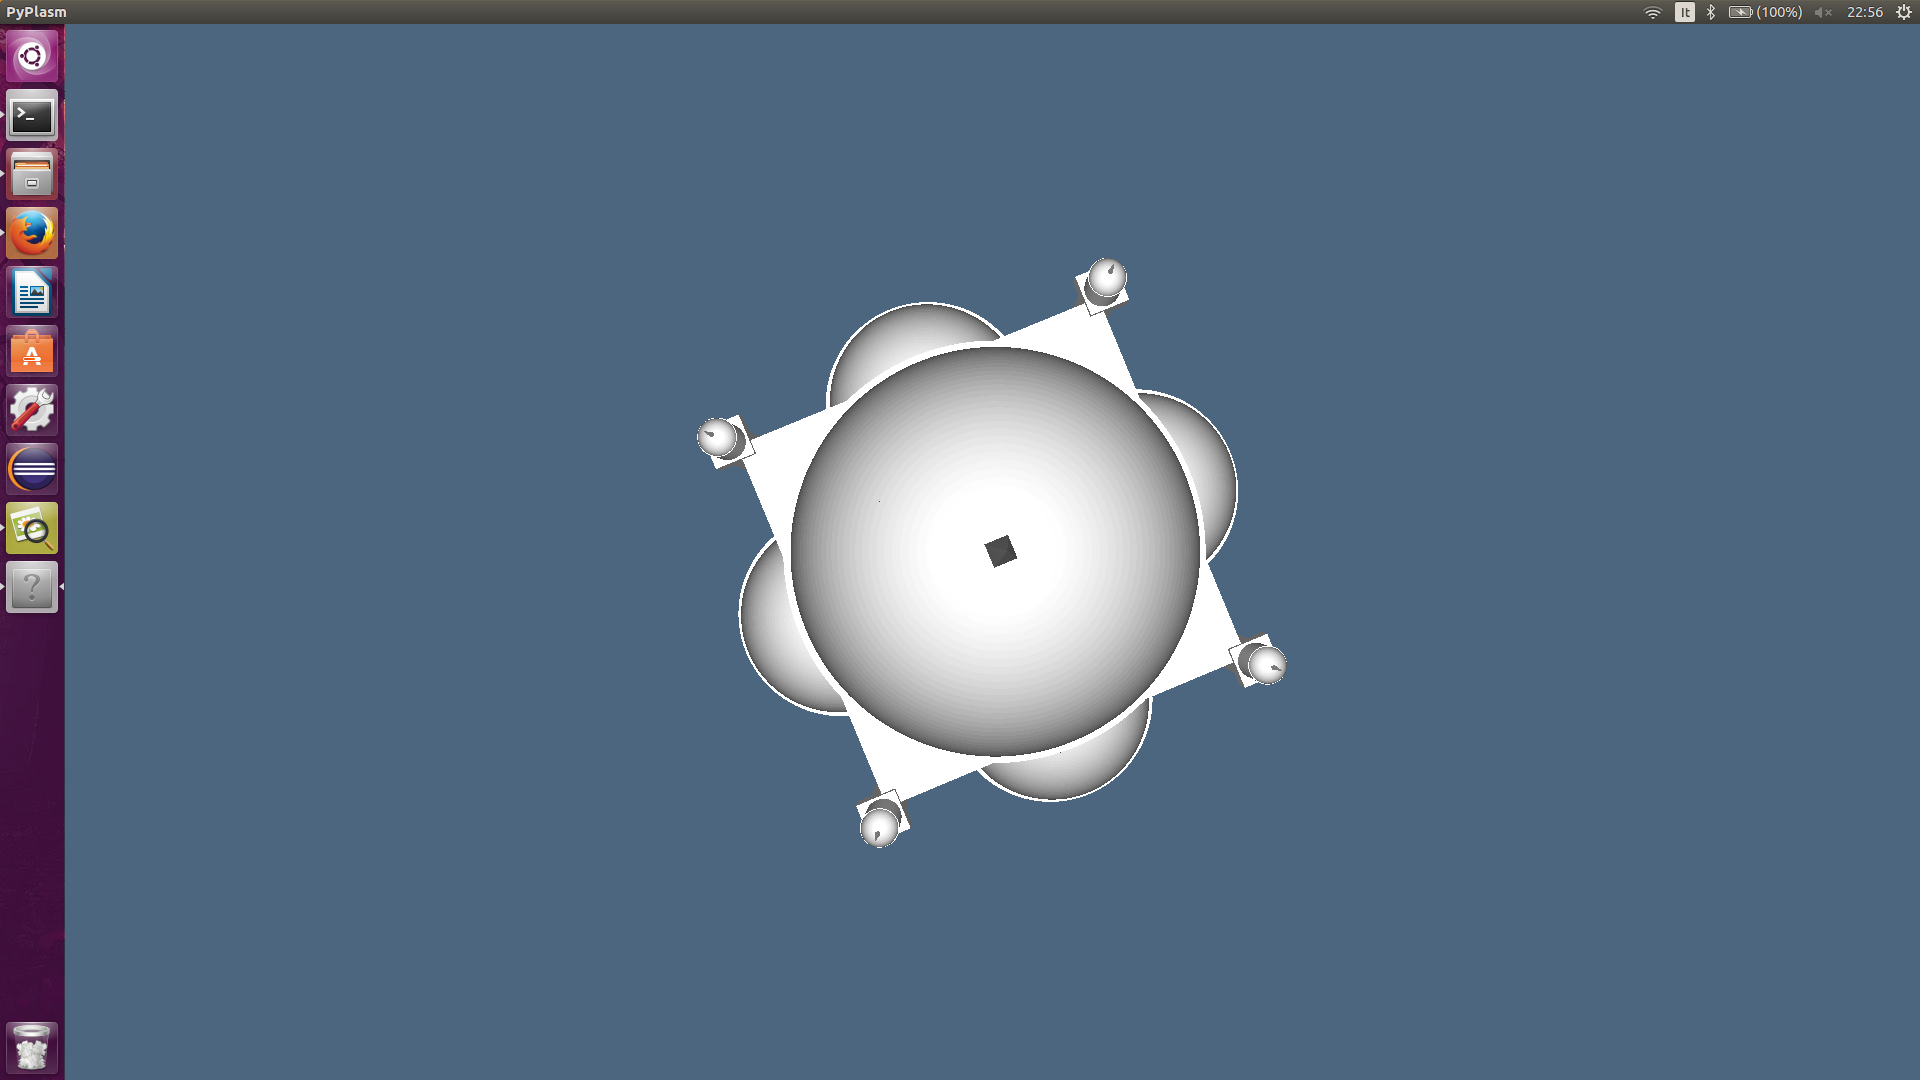

In [14]:
##################################
##        ASPETTO FINALE        ##
##################################

myQuarter = DIFFERENCE([quarterFacade(), T(3)(0.5)(hole2())])
final = STRUCT([myQuarter, R([1,2])(PI/2), myQuarter, R([1,2])(PI/2),
                myQuarter, R([1,2])(PI/2), myQuarter])
VIEW(final)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f73246453c0> >

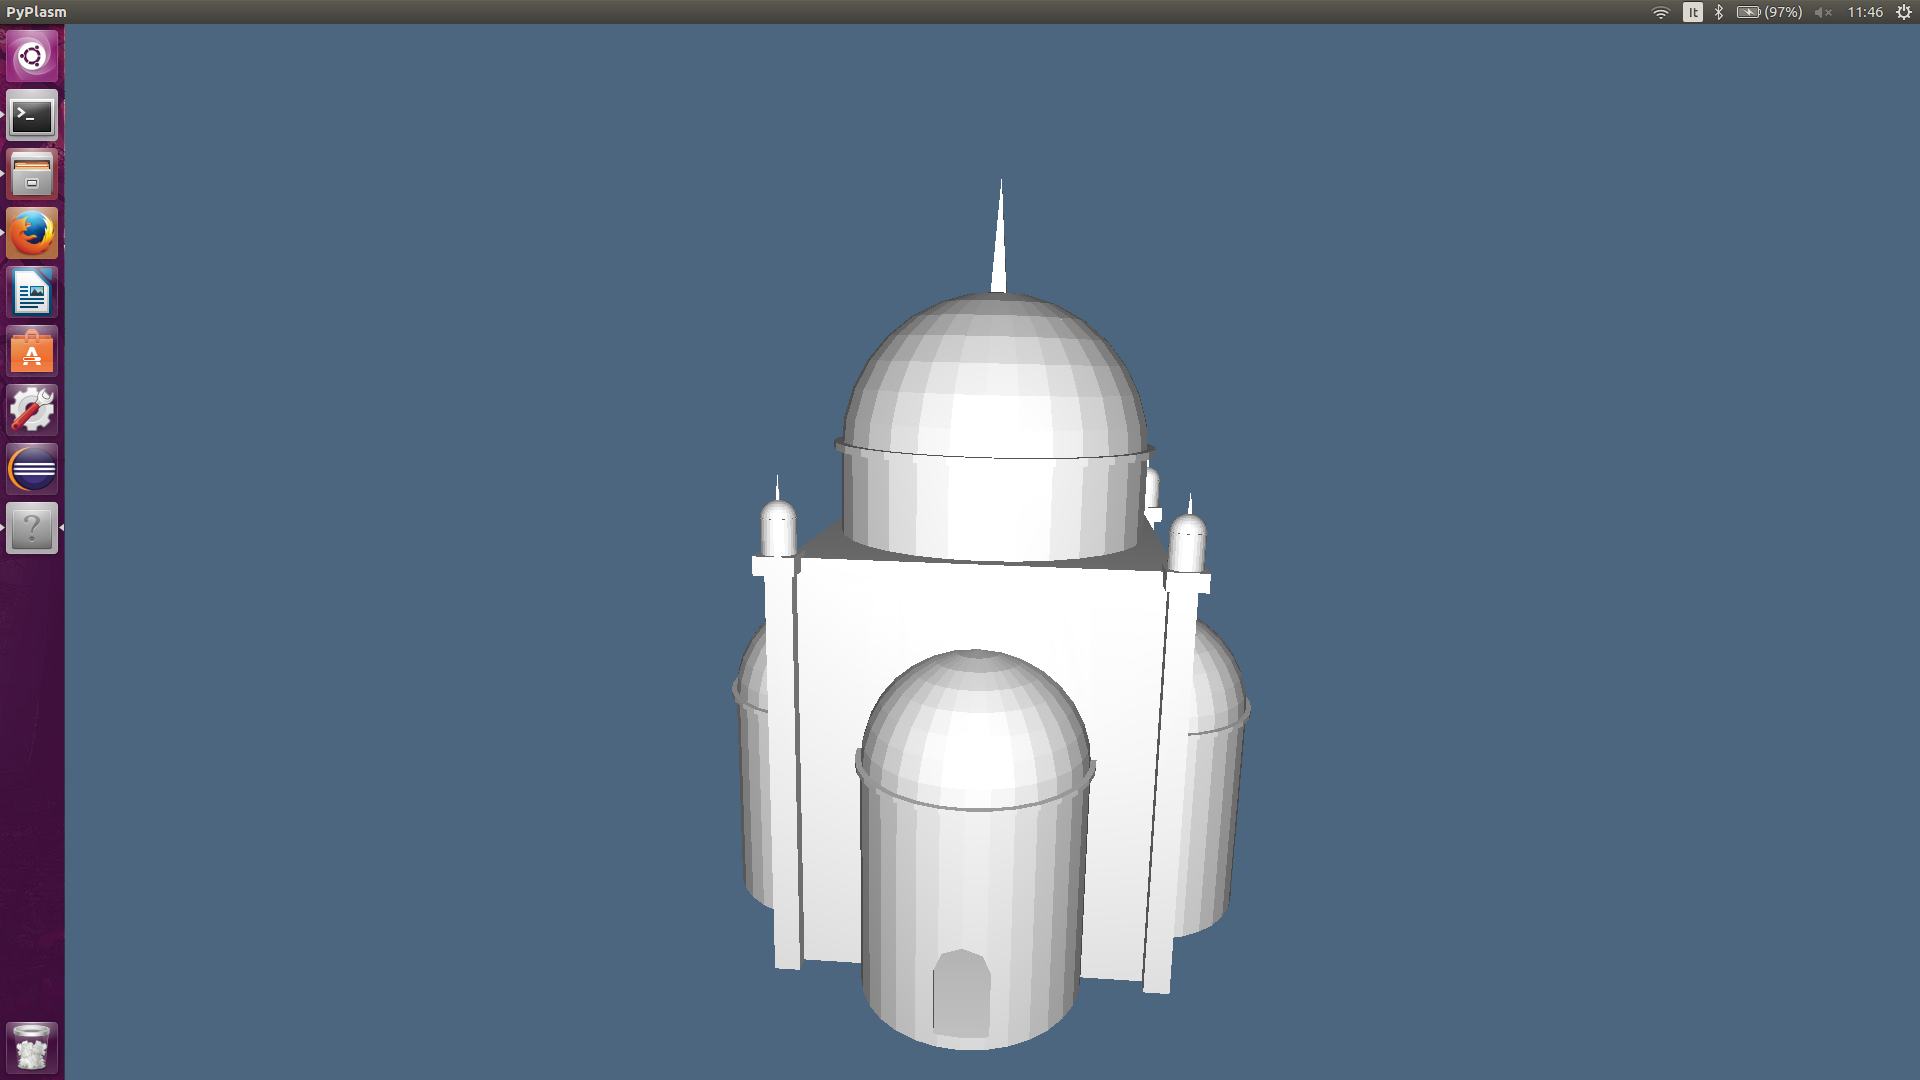
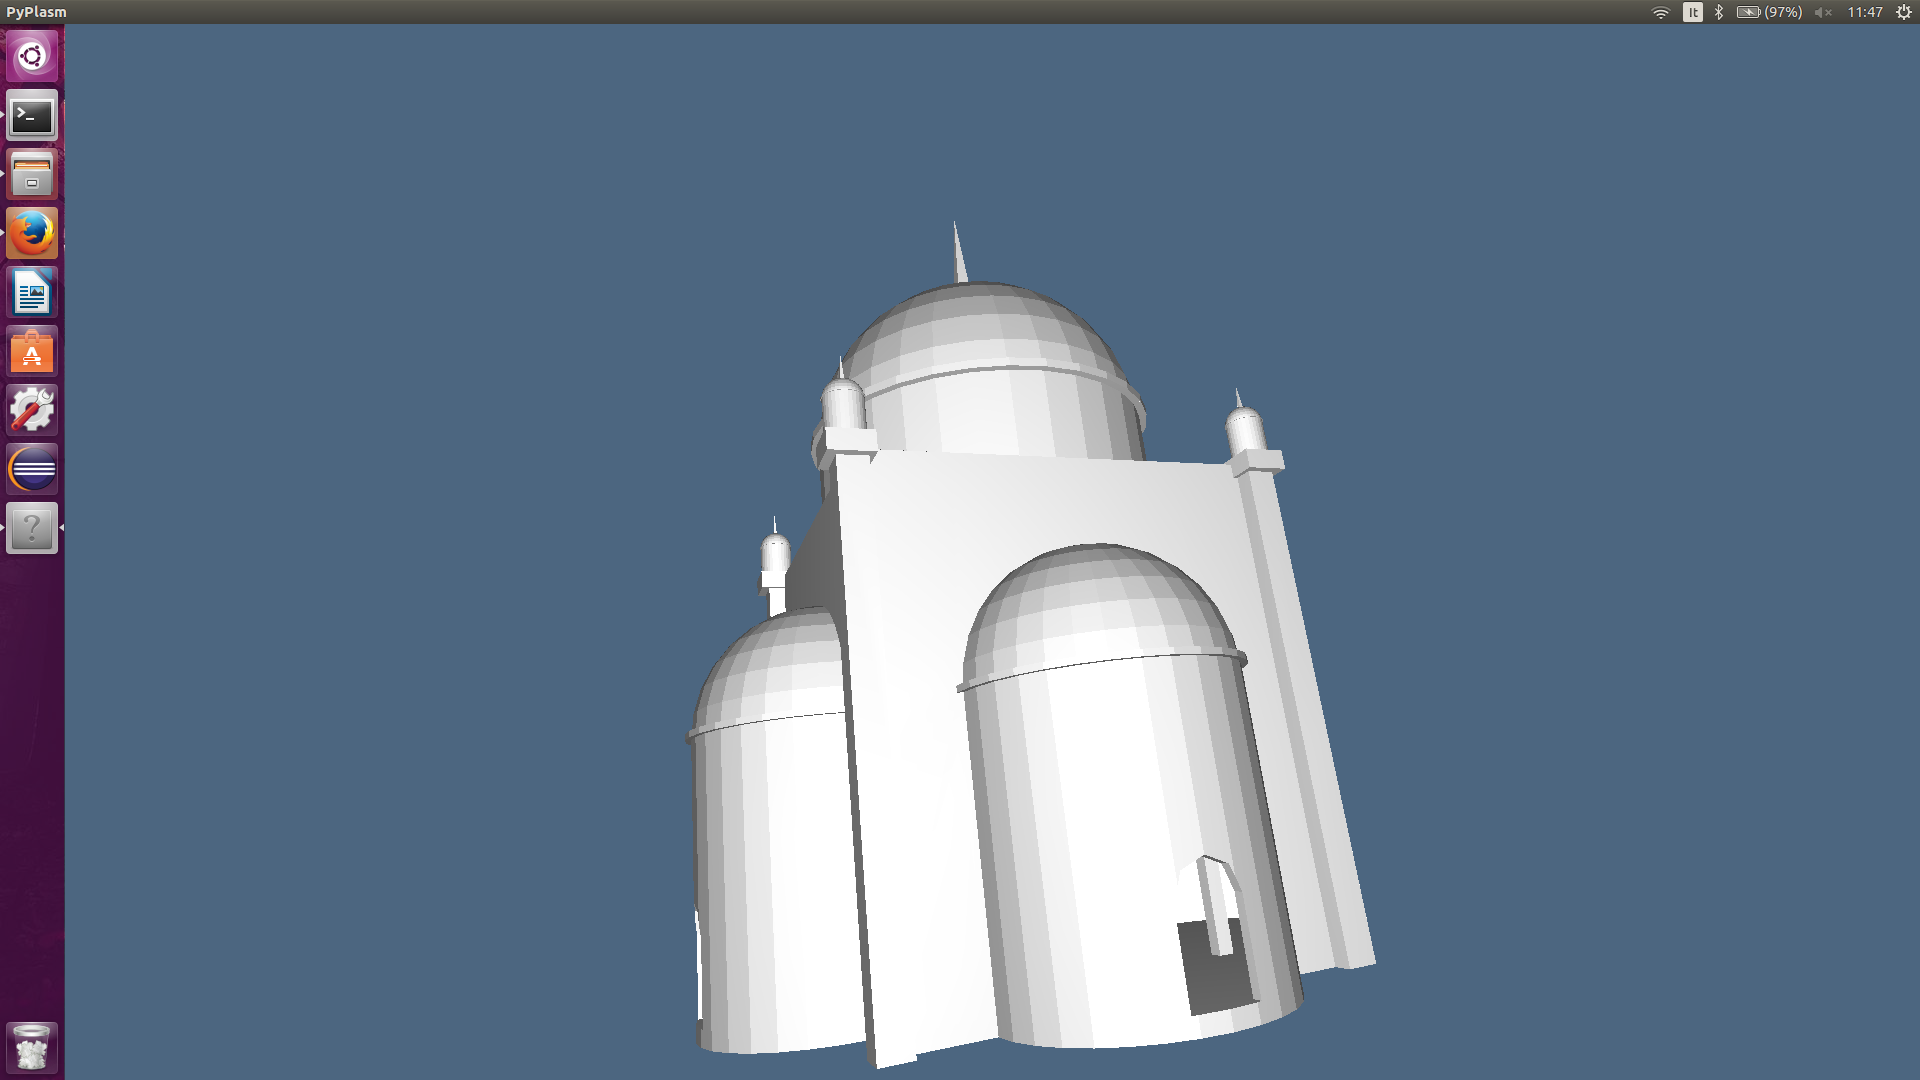
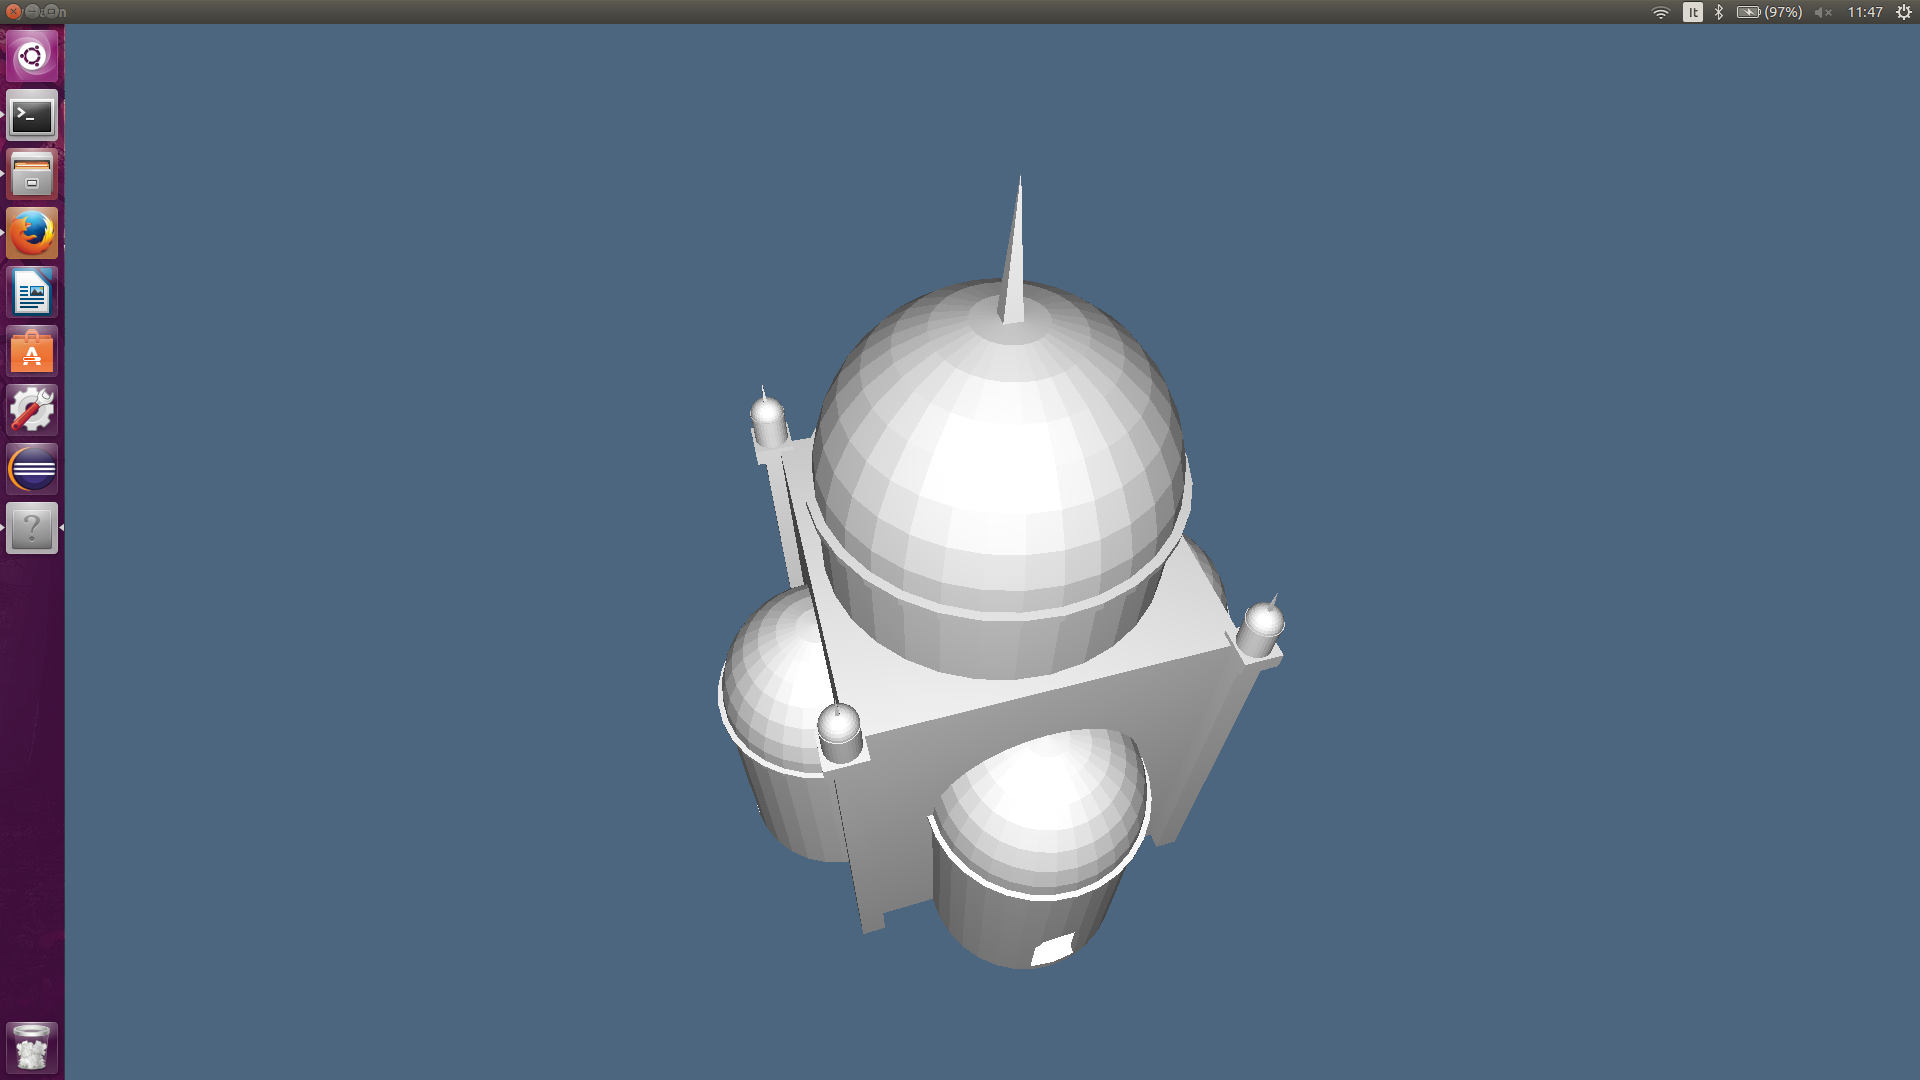